**INTRODUCTION**

> Pemblokiran indentasi

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Import The Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame

Import the Training DataSet

In [3]:
train = pd.read_csv('train.csv')
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298747,298748,Female,40,1,41.0,0,1-2 Year,Yes,23749.0,26.0,233.0,0.0
298748,298749,Male,24,1,28.0,1,< 1 Year,No,34259.0,152.0,166.0,0.0
298749,298750,Female,24,1,29.0,1,< 1 Year,No,42036.0,152.0,83.0,0.0
298750,298751,Female,22,1,21.0,1,< 1 Year,No,44554.0,152.0,224.0,0.0


**EXPLORATORY DATA ANALYSIS (EDA)**

RESPONSE dependence on categorical variables

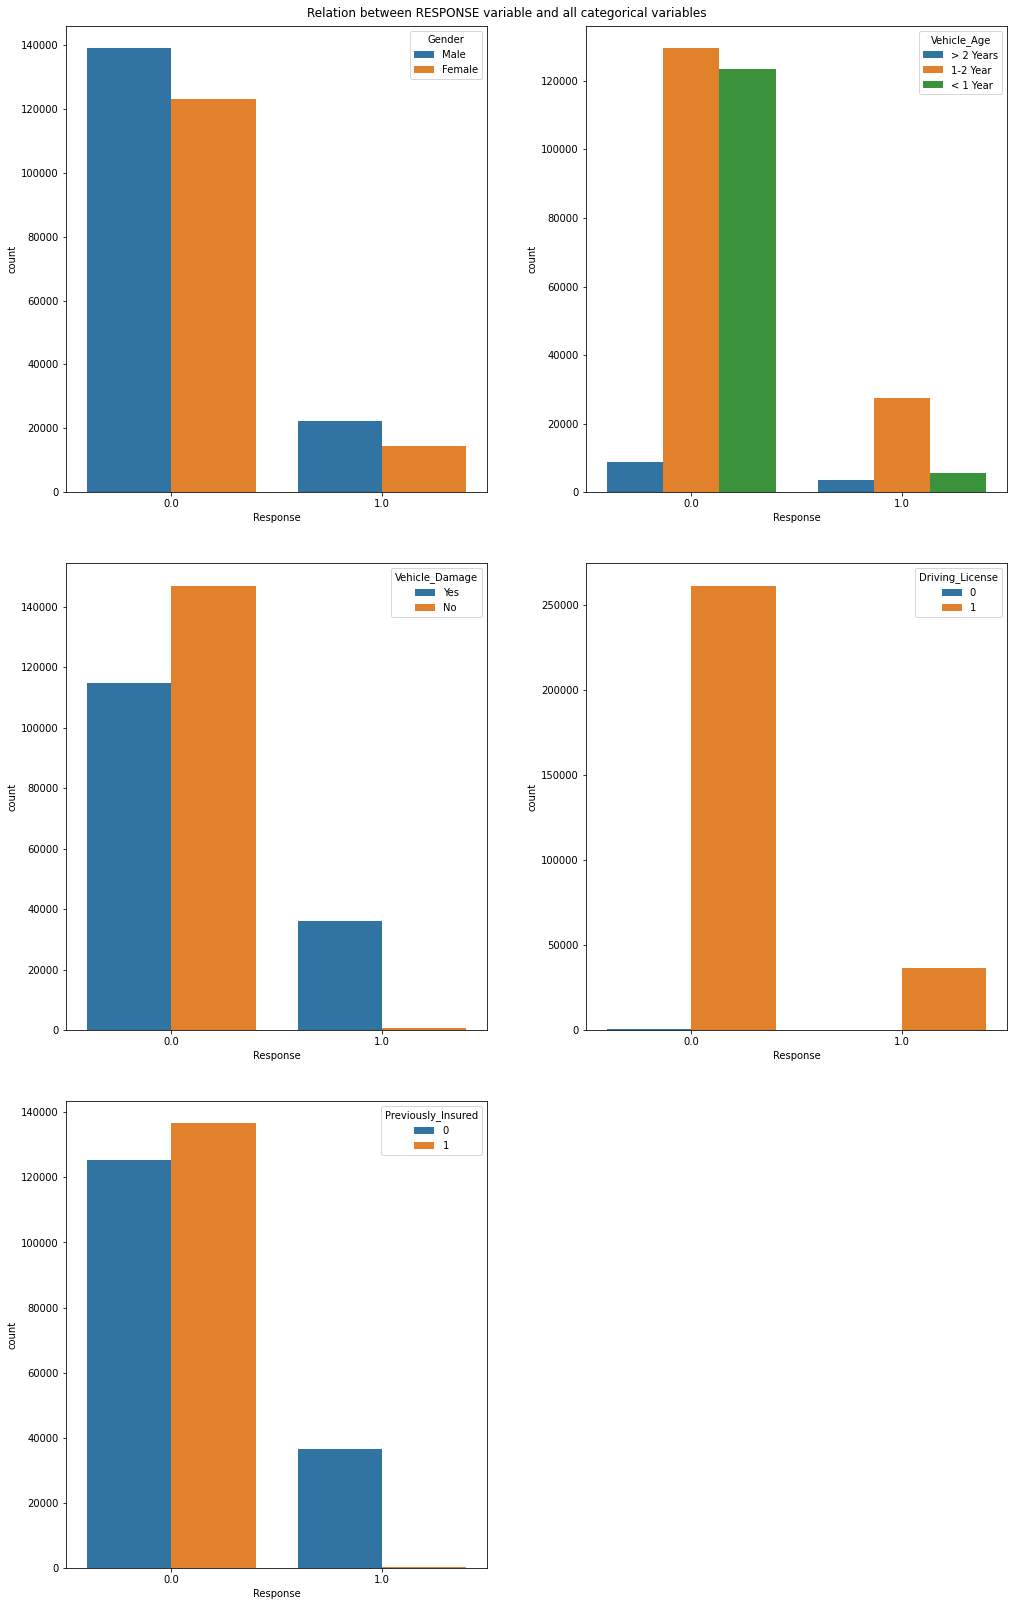

In [4]:
cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured']
fig = plt.figure(figsize=(15,30))
for c, i in zip(cols, range(1,8)):
  ax = fig.add_subplot(4,2,i)
  sns.countplot(x= train['Response'], hue = c, data = train)
fig.suptitle('Relation between RESPONSE variable and all categorical variables', y = 0.99)
fig.tight_layout(pad=4.0)

RESPONSE dependence on numerical variables

In [5]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298747,298748,Female,40,1,41.0,0,1-2 Year,Yes,23749.0,26.0,233.0,0.0
298748,298749,Male,24,1,28.0,1,< 1 Year,No,34259.0,152.0,166.0,0.0
298749,298750,Female,24,1,29.0,1,< 1 Year,No,42036.0,152.0,83.0,0.0
298750,298751,Female,22,1,21.0,1,< 1 Year,No,44554.0,152.0,224.0,0.0


In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,298752.0,149376.500000,86242.418148,1.0,74688.75,149376.5,224064.25,298752.0
Age,298752.0,38.815235,15.494707,20.0,25.00,36.0,49.00,85.0
Driving_License,298752.0,0.997858,0.046235,0.0,1.00,1.0,1.00,1.0
Region_Code,298752.0,26.383552,13.231482,0.0,15.00,28.0,35.00,52.0
Previously_Insured,298752.0,0.457828,0.498219,0.0,0.00,0.0,1.00,1.0
Annual_Premium,298752.0,30537.424633,17247.686932,2630.0,24391.00,31645.0,39361.25,540165.0
Policy_Sales_Channel,298752.0,112.116716,54.142181,1.0,29.00,133.0,152.00,163.0
Vintage,298751.0,154.336260,83.648025,10.0,82.00,154.0,227.00,299.0
Response,298751.0,0.122999,0.328436,0.0,0.00,0.0,0.00,1.0


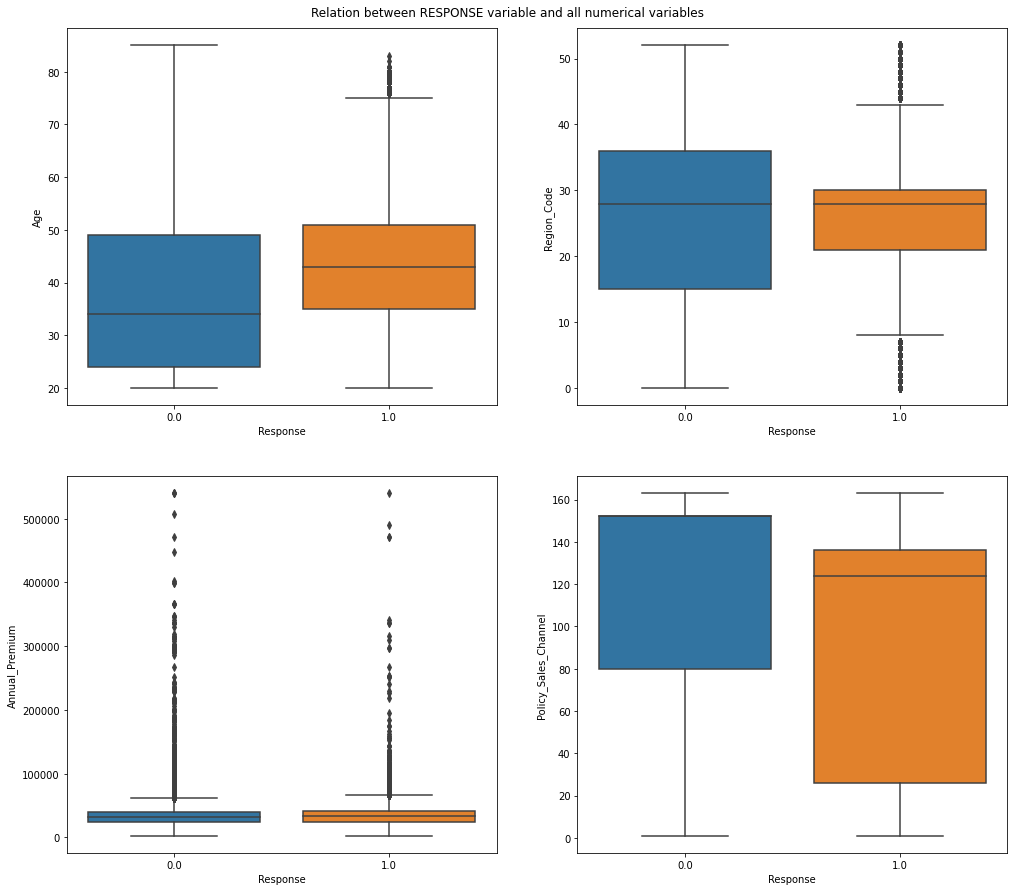

In [8]:
cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
fig = plt.figure(figsize=(15,25))
for c, i in zip(cols, range(1,5)):
  ax = fig.add_subplot(4,2,i)
  sns.boxplot(x= train['Response'], y = c, data = train)
fig.suptitle('Relation between RESPONSE variable and all numerical variables', y = 0.99)
fig.tight_layout(pad=4.0)

Relation Between Several Variables

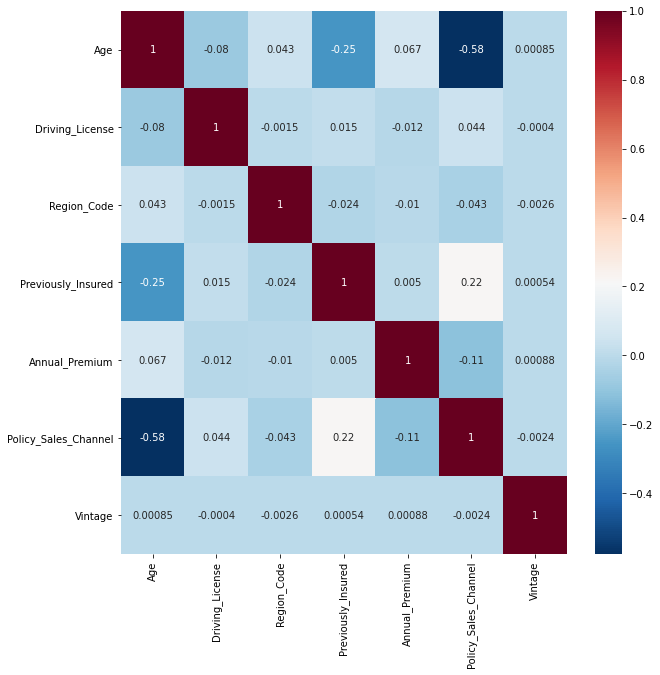

In [9]:
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(train.drop(columns=['id', 'Response']).corr(), annot=True, cmap='RdBu_r')

Handling The Missing Data

In [12]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298747,298748,Female,40,1,41.0,0,1-2 Year,Yes,23749.0,26.0,233.0,0.0
298748,298749,Male,24,1,28.0,1,< 1 Year,No,34259.0,152.0,166.0,0.0
298749,298750,Female,24,1,29.0,1,< 1 Year,No,42036.0,152.0,83.0,0.0
298750,298751,Female,22,1,21.0,1,< 1 Year,No,44554.0,152.0,224.0,0.0


In [10]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 1
Response                1
dtype: int64



> Pemblokiran indentasi

We can see the missing datas are from the same rows, that means it is identified as one client, which has the id '372956'. So for the data training process, we can eliminate this client's data. 

In [15]:
train_new = train.drop([298751], axis=0)
train_new.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**DATA PREPARATION**

Encoding the Categorical Variables

In [16]:
train_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298746,298747,Male,30,1,39.0,1,< 1 Year,No,42892.0,152.0,26.0,0.0
298747,298748,Female,40,1,41.0,0,1-2 Year,Yes,23749.0,26.0,233.0,0.0
298748,298749,Male,24,1,28.0,1,< 1 Year,No,34259.0,152.0,166.0,0.0
298749,298750,Female,24,1,29.0,1,< 1 Year,No,42036.0,152.0,83.0,0.0


In [17]:
#dataset
cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
data = train_new.drop(columns=['id'])

#onehotencoding
data_op = pd.concat([data,pd.get_dummies(data[cols])], axis=1)
data_new = data_op.drop(columns=cols)
X = data_new.drop(columns=['Response'])
yi = data_new['Response']

#onehotencoding for the label variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(yi)
print(y)

[1 0 1 ... 0 0 0]


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X, y) 

array([[ 0.33462426,  0.04633413,  0.12216721, ...,  4.7756421 ,
        -0.990144  ,  0.990144  ],
       [ 2.39985966,  0.04633413, -1.76726595, ..., -0.20939593,
         1.00995411, -1.00995411],
       [ 0.52824008,  0.04633413,  0.12216721, ...,  4.7756421 ,
        -0.990144  ,  0.990144  ],
       ...,
       [-0.95614786,  0.04633413,  0.12216721, ..., -0.20939593,
         1.00995411, -1.00995411],
       [-0.95614786,  0.04633413,  0.19774453, ..., -0.20939593,
         1.00995411, -1.00995411],
       [-1.08522507,  0.04633413, -0.40687408, ..., -0.20939593,
         1.00995411, -1.00995411]])

In [20]:
print('Number of features: %d' %(len(data_new.columns)))

Number of features: 15


In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
test = pd.read_csv('test.csv')
test_new = test.drop(columns=['id'])
test_new

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...
127032,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [38]:
#dataset
cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

#onehotencoding
data_op2 = pd.concat([test_new,pd.get_dummies(test_new[cols])], axis=1)
data_new = data_op2.drop(columns=cols)
data_new

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,25,1,11.0,1,35786.0,152.0,53,0,1,0,1,0,1,0
1,40,1,28.0,0,33762.0,7.0,111,0,1,1,0,0,0,1
2,47,1,28.0,0,40050.0,124.0,199,0,1,1,0,0,0,1
3,24,1,27.0,1,37356.0,152.0,187,0,1,0,1,0,0,1
4,27,1,28.0,1,59097.0,152.0,297,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127032,26,1,37.0,1,30867.0,152.0,56,1,0,0,1,0,1,0
127033,38,1,28.0,0,28700.0,122.0,165,1,0,1,0,0,0,1
127034,21,1,46.0,1,29802.0,152.0,74,0,1,0,1,0,1,0
127035,71,1,28.0,1,62875.0,26.0,265,0,1,1,0,0,1,0


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(data_new)

array([[-0.89008939,  0.04323292, -1.17032742, ..., -0.20904394,
         1.00499528, -1.00499528],
       [ 0.07979548,  0.04323292,  0.11658969, ..., -0.20904394,
        -0.99502955,  0.99502955],
       [ 0.53240842,  0.04323292,  0.11658969, ..., -0.20904394,
        -0.99502955,  0.99502955],
       ...,
       [-1.14872536,  0.04323292,  1.47920782, ..., -0.20904394,
         1.00499528, -1.00499528],
       [ 2.08422421,  0.04323292,  0.11658969, ..., -0.20904394,
         1.00499528, -1.00499528],
       [ 0.14445447,  0.04323292,  0.1922907 , ..., -0.20904394,
         1.00499528, -1.00499528]])

In [41]:
y_pred = classifier.predict(sc.fit_transform(data_new))
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [46]:
pred = Series(y_pred)
iden = test['id']
final = pd.concat([test, pred], axis=1)
final1 = final.rename(columns={0 : "Response_Pred"})
final2 = final1.sort_values(by='Response_Pred', ascending=False)
final3 = final2.set_index(Series([x for x in range(1,len(iden)+1)]))
final3

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response_Pred
1,444628,Female,64,1,28.0,0,1-2 Year,Yes,32000.0,122.0,111,1
2,481784,Female,27,1,3.0,0,< 1 Year,Yes,28167.0,152.0,218,1
3,433455,Female,24,1,46.0,0,< 1 Year,Yes,24782.0,152.0,40,1
4,433454,Male,69,1,50.0,1,1-2 Year,Yes,30691.0,116.0,278,1
5,481782,Female,24,1,36.0,0,< 1 Year,Yes,49021.0,152.0,299,1
...,...,...,...,...,...,...,...,...,...,...,...,...
127033,437434,Female,23,1,18.0,1,< 1 Year,No,30425.0,152.0,280,0
127034,437432,Male,24,1,36.0,1,< 1 Year,No,44851.0,152.0,146,0
127035,437425,Female,20,1,37.0,1,< 1 Year,No,2630.0,160.0,18,0
127036,437418,Female,75,1,0.0,0,1-2 Year,No,2630.0,26.0,292,0


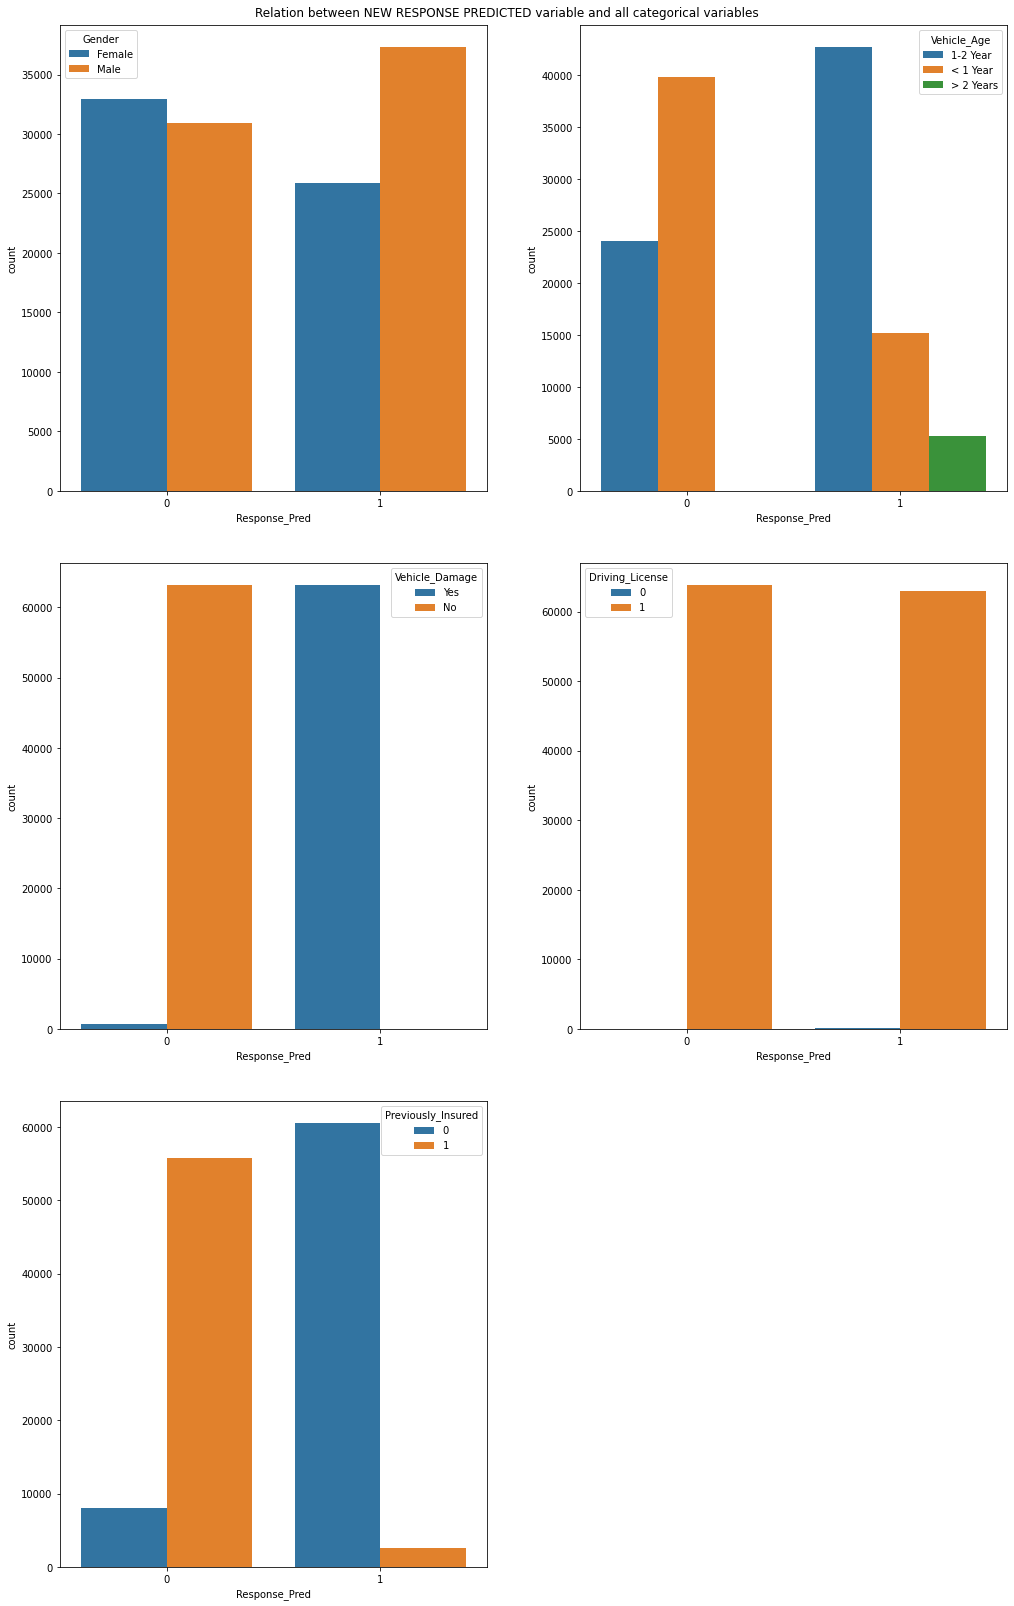

In [48]:
colms = ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Driving_License', 'Previously_Insured']
fig = plt.figure(figsize=(15,30))
for c, i in zip(colms, range(1,8)):
  ax = fig.add_subplot(4,2,i)
  sns.countplot(x= final3['Response_Pred'], hue = c, data = final3)
fig.suptitle('Relation between NEW RESPONSE PREDICTED variable and all categorical variables', y = 0.99)
fig.tight_layout(pad=4.0)